# <center> KITTIDATASET CLASS </center>

The following displays how the dataset is initialized and datapoints are visualized

In [1]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt

os.chdir('..')
from models.dataloader import CustomKittiDataset
from util.config_util import load_config,save_config

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
train_config_path = 'configs/car_auto_T0_train_config'
config_path   = 'configs/car_auto_T0_config'

train_config  = load_config(train_config_path)
config        = load_config(config_path)

In [5]:
dataset = CustomKittiDataset(config=config,train_config=train_config)           # initialize data object

Loaded 958 Pedestrian for augmentation
Loaded 3993 Car for augmentation
Loaded 204 Cyclist for augmentation


In [2]:
# creates and load json file conatining cropped boxes
# kitti.save_cropped_boxes()
cropped_labels,cropped_cam_points = dataset.load_cropped_boxes()

NameError: name 'dataset' is not defined

# <center> VISUALISATIONS </center>

In [ ]:
# visualizes isolated objects
dataset.vis_cropped_boxes(cropped_labels,cropped_cam_points,object_class='Pedestrian')


Pedestrian
Pedestrian


In [1]:
# visualizes augmented objects in scene
dataset.vis_crop_aug_sampler()

NameError: name 'dataset' is not defined

5342
pc shape = (17737, 3)


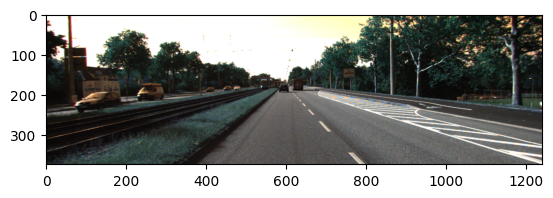

In [4]:
# random sample
idx = random.choice(range(len(dataset)))
print(idx)
# print image
plt.imshow(dataset.get_image(idx))
# print downsampled and colored pcd
dataset.inspect_points(frame_idx=idx,downsample_voxel_size=0.01)
# print first layer connections
dataset.visualize_graph(frame_idx=idx)

# <center> DATSET & DATALOADER</center>

In [6]:
input_v,vertex_idx_list,edges_list,cls_labels,encoded_boxes,valid_boxes = dataset[79]

c:\Users\prfej\miniconda3\envs\gnn.test\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\prfej\miniconda3\envs\gnn.test\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# <center> GEO-OPT </center>

In [ ]:
from geoopt.manifolds import StereographicExact
from geoopt import ManifoldTensor
import torch

manifold    = StereographicExact(k=-0.01,learnable=True)
velo_points = dataset.get_velo_points(idx)
velo_points = torch.from_numpy(velo_points.xyz).double()
velo_points = ManifoldTensor(velo_points, manifold=manifold)

In [ ]:
print(velo_points)
velo_points.proj_()
print(velo_points)

In [ ]:
points_eucl = torch.linspace(0,100,100)[::,torch.newaxis]*torch.tensor([1,1,1])
diffs_eucl  = points_eucl[1:] - points_eucl[:-1]
dist_eucl   = torch.linalg.norm(diffs_eucl, axis=1)
print(dist_eucl)

points_stereo = ManifoldTensor(points_eucl,manifold=manifold)
points_stereo.proj_()
# diffs_stereo  = points_stereo[1:] - points_stereo[:-1]
# dist_stereo   = torch.linalg.norm(diffs_stereo, axis=1)
# print(dist_stereo)